---
title: Deep Learning with Pytorch (Example implementations)
excerpt: This post implements the examples and exercises in the book "Deep Learning with Pytorch" by Eli Stevens, Luca Antiga, and Thomas Viehmann.
series: ml
date: 2020-08-20 23:50:52
type: post
---

This post implements the examples and exercises in the book "[Deep Learning with Pytorch](https://pytorch.org/deep-learning-with-pytorch)" by Eli Stevens, Luca Antiga, and Thomas Viehmann.

What I love the most about this intro-level book is its interesting hand-drawing diagrams that illustrates different types of neural networks and machine learning pipeline, and it uses real-world, real-scale machine learning problems as the examples.

The difference between traditional machine learning (a.k.a feature engineering) and deep learning

> ![dl_pytorch_c2_0](https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/dl_pytorch_c1.png)
>
> -- From the book "Deep Learning with Pytorch"

${toc}

## Chapter I: Setting up pytorch environment

I like very much this lovely diagram showing the general end-to-end data flow pipeline of deep learning applications.

> ![c1_diagram](https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/dl_pytorch_c1.png)
> 
> -- From the book "Deep Learning with Pytorch"



In [1]:
import os
import torch
torch.cuda.is_available()

/opt/venv/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


False

## Chapter II: Using pretrained models

It is only about the inference process when we only use the pretrained deep learning models. I think it is actually a better way to step into deep learning algorithms for novices because it draws users' attention on what the network can achieve at first and it also separates the concern of data preprocessing from the training process, which both could be tedious and complicated.

The inference process of image classification using deep learning

> ![dl_pytorch_c2_1](https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/dl_pytorch_c2_1.png)
> 
> -- From the book "Deep Learning with Pytorch"

### Image classifications with AlexNet and ResNet101

In [3]:
import torchvision as vis

In [4]:
vis_models = vis.models
dir(vis_models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

In [5]:
# AlexNet, untrained
alex_net = vis_models.AlexNet()
# AlexNet, pretrained
alex_net = vis_models.alexnet(pretrained=True)
# ResNet101, pretrained
res_net_101 = vis_models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /home/jovyan/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth



Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /home/jovyan/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


In [6]:
# Check network structure
alex_net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

The network structure of __AlexNet__

> ![dl_pytorch_c2_2_alexnet](https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/dl_pytorch_c2_2_alexnet.png)
>
> -- From the book "Deep Learning with Pytorch"

In [7]:
# Define preprocess transforms for input images
preprocess = vis.transforms.Compose([
    vis.transforms.Resize(256),
    vis.transforms.CenterCrop(224),
    vis.transforms.ToTensor(),
    vis.transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

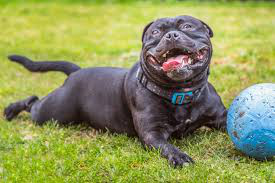

In [13]:
# Preprocess a test image
import PIL as pil
import requests
from io import BytesIO

img_url = 'https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/dog.jpg'
response = requests.get(img_url)
img = pil.Image.open(BytesIO(response.content))

img_t = preprocess(img)
img

In [14]:
# Transform it into input batches
batch_t = torch.unsqueeze(img_t, 0)
batch_t.size()

torch.Size([1, 3, 224, 224])

In [25]:
# Load ImageNet classes
class_url = "https://gist.githubusercontent.com/ageitgey/4e1342c10a71981d0b491e1b8227328b/raw/24d78ea09a31fdff540a8494886e0051e3ad68f8/imagenet_classes.txt"
response = requests.get(class_url)
content = BytesIO(response.content).getvalue().decode("utf-8")
lines = content.split('\n')[4:]
labels = [line.split(',')[1].strip() for line in lines]
print(labels)

['tench', 'goldfish', 'great_white_shark', 'tiger_shark', 'hammerhead', 'electric_ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house_finch', 'junco', 'indigo_bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water_ouzel', 'kite', 'bald_eagle', 'vulture', 'great_grey_owl', 'European_fire_salamander', 'common_newt', 'eft', 'spotted_salamander', 'axolotl', 'bullfrog', 'tree_frog', 'tailed_frog', 'loggerhead', 'leatherback_turtle', 'mud_turtle', 'terrapin', 'box_turtle', 'banded_gecko', 'common_iguana', 'American_chameleon', 'whiptail', 'agama', 'frilled_lizard', 'alligator_lizard', 'Gila_monster', 'green_lizard', 'African_chameleon', 'Komodo_dragon', 'African_crocodile', 'American_alligator', 'triceratops', 'thunder_snake', 'ringneck_snake', 'hognose_snake', 'green_snake', 'king_snake', 'garter_snake', 'water_snake', 'vine_snake', 'night_snake', 'boa_constrictor', 'rock_python', 'Indian_cobra', 'green_mamba', 'sea_snake', 'horned_viper', 'diamondback', 

In [26]:
# Run pretrained AlexNet on the test image and produce top 5 predictions
alex_net.eval()
out = alex_net(batch_t)
out_perc = torch.nn.functional.softmax(out, dim=1)[0] * 100

sorted_scores, sorted_indices = torch.sort(out, descending=True)

[(labels[i], out_perc[i].item()) for i in sorted_indices[0][:5]]

[('Mexican_hairless', 52.925865173339844),
 ('Staffordshire_bullterrier', 22.006467819213867),
 ('Labrador_retriever', 3.8847944736480713),
 ('American_Staffordshire_terrier', 3.3939406871795654),
 ('German_short-haired_pointer', 3.3705554008483887)]

In [27]:
# Run pretrained ResNet101 on the test image and produce top 5 predictions
res_net_101.eval()
out = res_net_101(batch_t)
out_perc = torch.nn.functional.softmax(out, dim=1)[0] * 100

sorted_scores, sorted_indices = torch.sort(out, descending=True)

[(labels[i], out_perc[i].item()) for i in sorted_indices[0][:5]]

[('Staffordshire_bullterrier', 48.7598762512207),
 ('pug', 21.433822631835938),
 ('French_bulldog', 19.77810287475586),
 ('bull_mastiff', 3.6309268474578857),
 ('Brabancon_griffon', 3.0445988178253174)]

### Generating fake real-looking images using GAN networks (CycleGAN)

GAN game is an adversial process that two networks are competing each other in a cheating game, where the "generator" network is the cheater while the "discriminator" network is the wiseman. When succeeding, the "generator" network can produce real-looking images that the "discriminator" network cannot discern.

The process of GAN game

> ![dl_pytorch_c2_3_gan](https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/dl_pytorch_c2_3_gan.png)
>
> -- From the book "Deep Learning with Pytorch"

#### CycleGAN

Different from normal GAN network, CycleGAN can learn to generate fake images in a different domain using training data from two different domains.

The process of CycleGAN game

> ![](https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/dl_pytorch_c2_4_cyclegan.png)
>
> -- From the book "Deep Learning with PyTorch"

---


In [28]:
# The implementation of CycleGAN generator using ResNet
# See https://github.com/deep-learning-with-pytorch/dlwpt-code/blob/master/p1ch2/3_cyclegan.ipynb
import torch.nn as nn

class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3> 

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)

In [29]:
# The structure of the generator is complicated.

netG = ResNetGenerator()
netG

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

In [30]:
# Load pretrained horse-to-zebra CycleGAN model parameters
# See https://github.com/deep-learning-with-pytorch/dlwpt-code/tree/master/data/p1ch2

model_url = 'https://github.com/deep-learning-with-pytorch/dlwpt-code/raw/master/data/p1ch2/horse2zebra_0.4.0.pth'
response = requests.get(model_url)
model_data = torch.load(BytesIO(response.content))
netG.load_state_dict(model_data)

<All keys matched successfully>

In [31]:
# Again, prepare the preprocessing transforms for input images
# A simple resize is good enough

preprocess = vis.transforms.Compose([
    vis.transforms.Resize(256),
    vis.transforms.ToTensor()
])

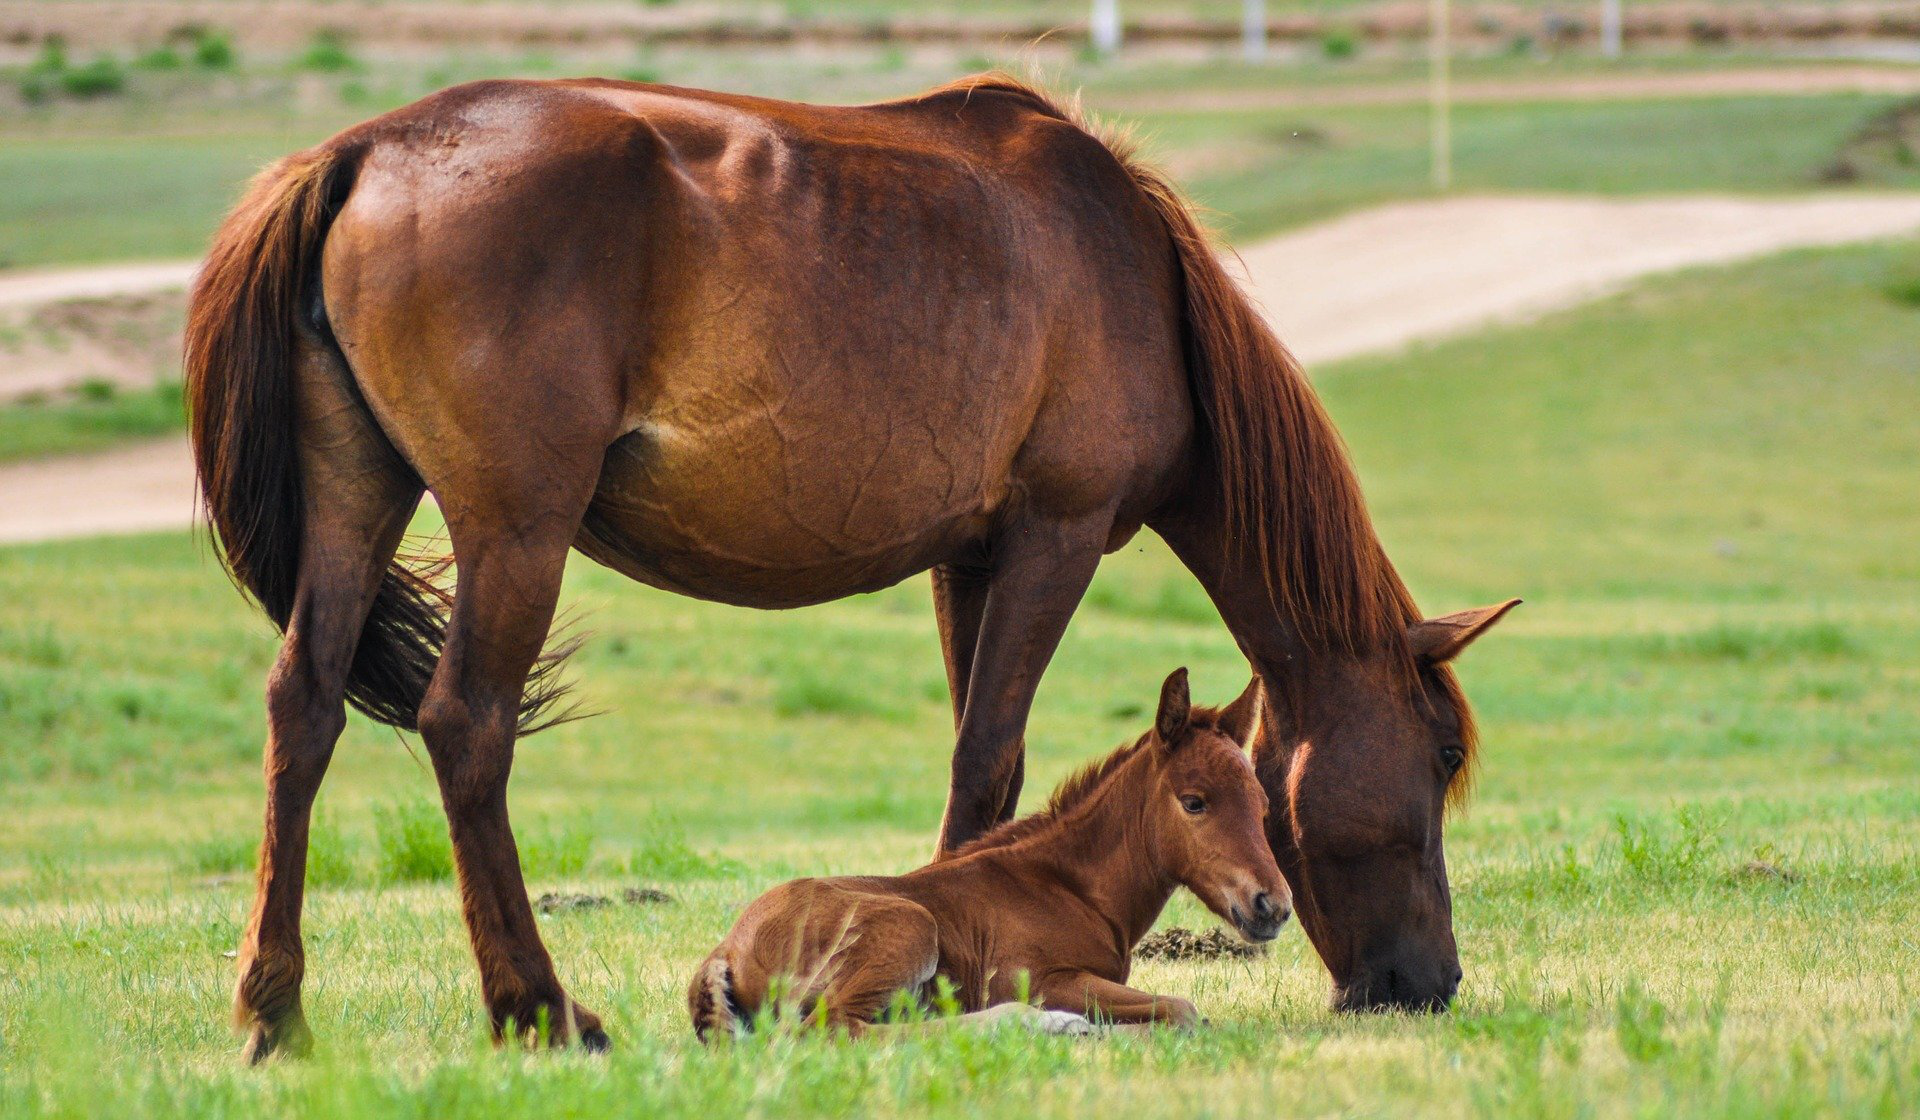

In [43]:
# Load our test images we downloaded

img_url = 'https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/horse.jpg'
response = requests.get(img_url)
img = pil.Image.open(BytesIO(response.content))
img

In [44]:
# Prepare the image as network input
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)

In [45]:
# Run the pretrained generator on the image
netG.eval()
batch_out = netG(batch_t)

# Transform the output back to an image
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = vis.transforms.ToPILImage()(out_t)
out_img.save(os.path.expanduser('~/Pictures/data/zebra.jpg'))
out_img

FileNotFoundError: [Errno 2] No such file or directory: '/home/jovyan/Pictures/data/zebra.jpg'

### Generating scene description using captioning model

Unlike the CNN model used for image classification and GAN model used for image generation, the captioning model uses RNN (Recurrent neural network) model for text generation, prepended with a CNN model for image classification.

"Recurrent" means the output of previous forward pass will serve as the input of the current forward pass.

Concept of a captioning model

> ![dl_pytorch_c2_5_caption](/media/uploads/dl_pytorch_c2_5_caption.png)
>
> -- From the Book "Deep Learning with Pytorch"


#### The NeuralTalk2 captioning model

The model[^1] was proposed by Andrea Karpathy. Here I use the implementation[^2] provided by the book, with mostly the default settings. Please visit the repo to see full available options. My forked repo[^3] applied two fixes to the original code.

1. Fixed the error when loading the infos pickle file on Windows.
2. Support `~` in input file paths.

[^1]: Andrej Karpathy and Li Fei-Fei, “Deep Visual-Semantic Alignments for Generating Image Descriptions,”
https://cs.stanford.edu/people/karpathy/cvpr2015.pdf.
[^2]: https://github.com/deep-learning-with-pytorch/ImageCaptioning.pytorch
[^3]: https://github.com/qutang/ImageCaptioning.pytorch

---

In [19]:
# run the pretrained model, it will run the two image examples we used before and also the zebra image we generated using the CycleGAN model

!cd ../../ImageCaptioning.pytorch && python eval.py --model ./data/FC/fc-model.pth --infos_path ./data/FC/fc-infos.pkl --image_folder ~/Pictures/data

Done. Saved 161416 bytes.
DataLoaderRaw loading images from folder:  C:\Users\tqshe/Pictures/data
0


C:\Users\tqshe\projects\v2.qutang.dev\contents\.venv\lib\site-packages\torch\nn\functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Users\tqshe\projects\v2.qutang.dev\contents\.venv\lib\site-packages\torch\nn\functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\tqshe\projects\ImageCaptioning.pytorch\models\FCModel.py:147: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  logprobs = F.log_softmax(self.logit(output))
C:\Users\tqshe\projects\ImageCaptioning.pytorch\models\FCModel.py:123: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  logprobs = F.log_softmax(self.logit(output))


listing all images in directory C:\Users\tqshe/Pictures/data
DataLoaderRaw found  3  images
cp "C:\Users\tqshe/Pictures/data\dog.jpg" vis/imgs/img1.jpg
image 1: a dog is sitting in the grass with a frisbee
cp "C:\Users\tqshe/Pictures/data\horse.jpg" vis/imgs/img2.jpg
image 2: a brown horse standing in a field of grass
cp "C:\Users\tqshe/Pictures/data\zebra.jpg" vis/imgs/img3.jpg
image 3: a group of zebras standing in a field
cp "C:\Users\tqshe/Pictures/data\dog.jpg" vis/imgs/img4.jpg
image 1: a dog is sitting in the grass with a frisbee
cp "C:\Users\tqshe/Pictures/data\horse.jpg" vis/imgs/img5.jpg
image 2: a brown horse standing in a field of grass
cp "C:\Users\tqshe/Pictures/data\zebra.jpg" vis/imgs/img6.jpg
image 3: a group of zebras standing in a field
cp "C:\Users\tqshe/Pictures/data\dog.jpg" vis/imgs/img7.jpg
image 1: a dog is sitting in the grass with a frisbee
cp "C:\Users\tqshe/Pictures/data\horse.jpg" vis/imgs/img8.jpg
image 2: a brown horse standing in a field of grass
cp "C:

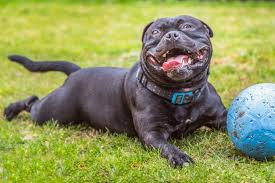

a dog is sitting in the grass with a frisbee


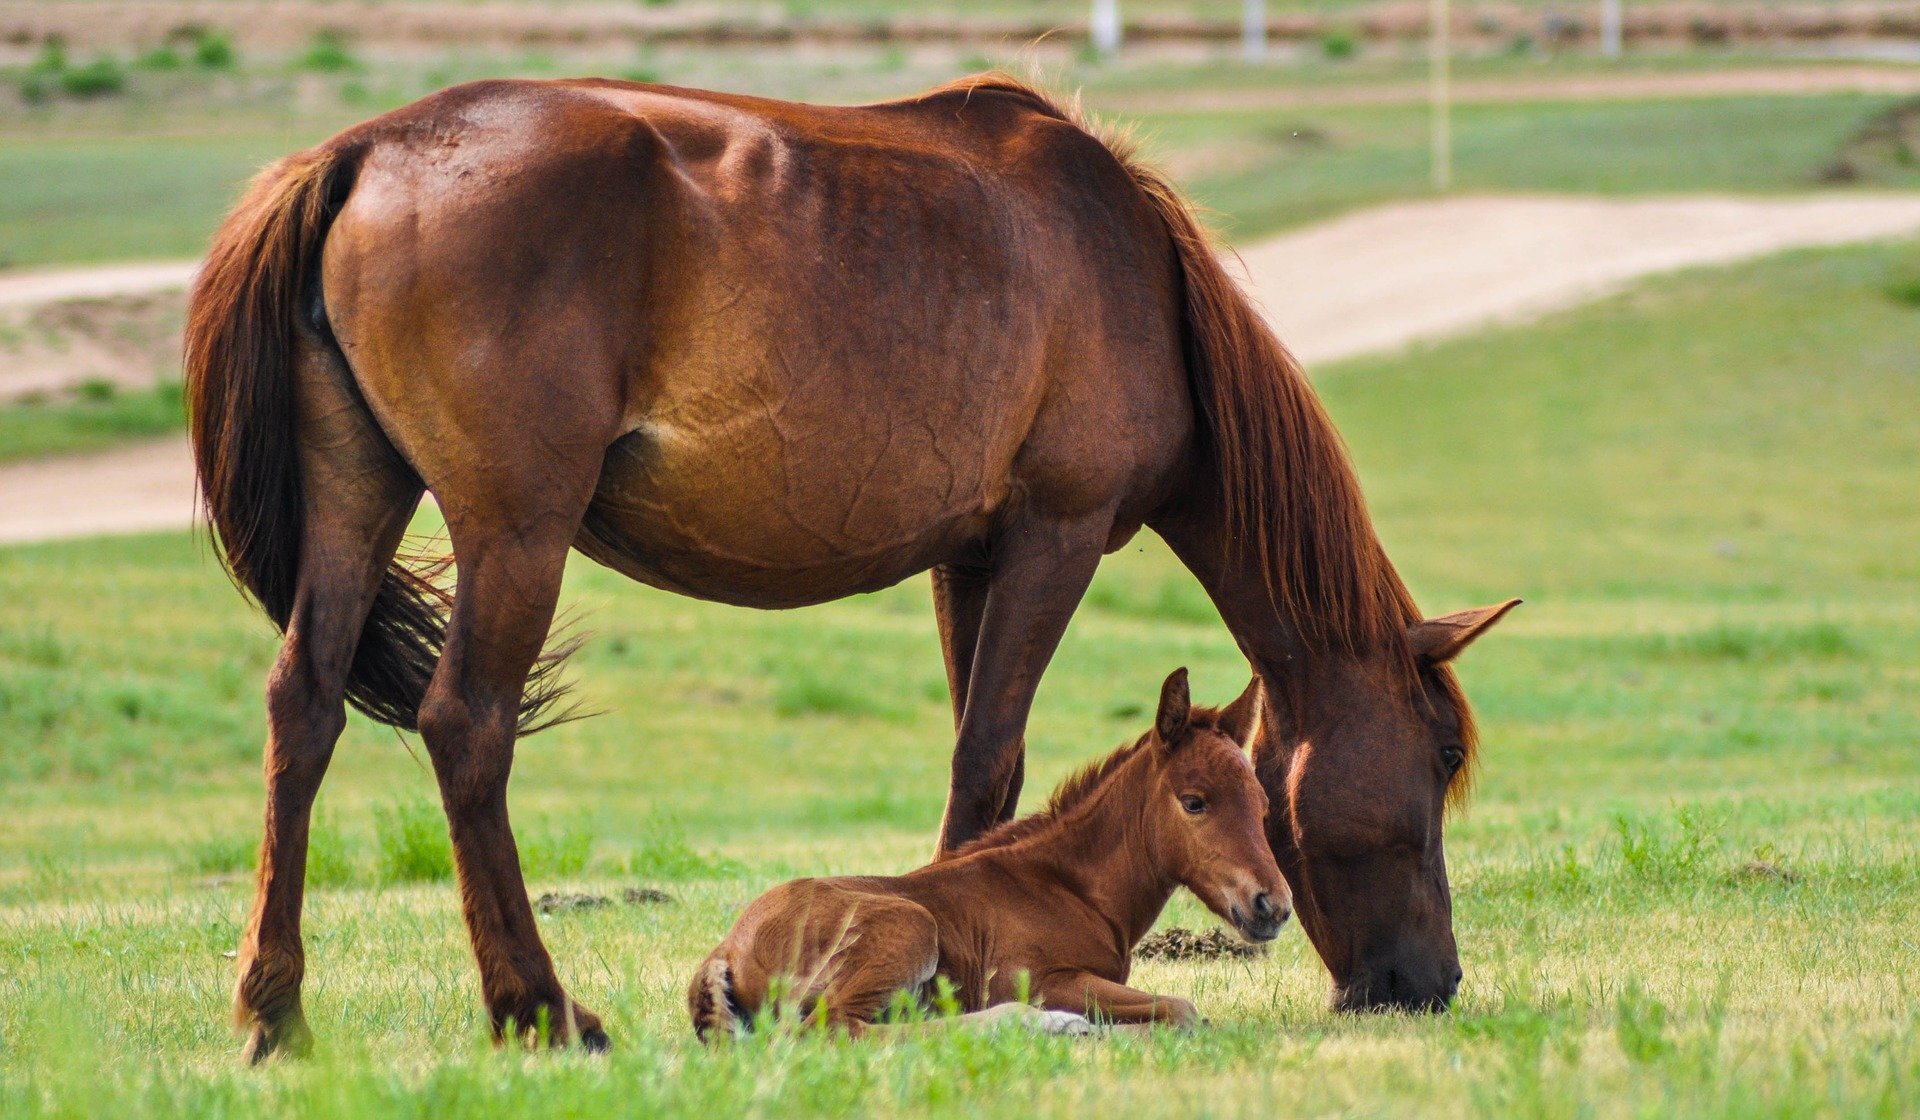

a brown horse standing in a field of grass


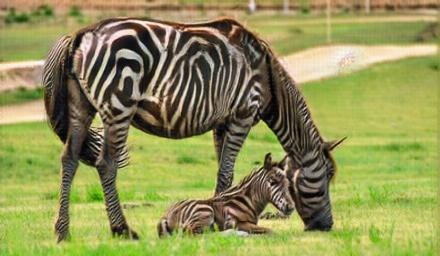

a group of zebras standing in a field


In [20]:
# Display the results
import json
from IPython.display import display
with open('../../ImageCaptioning.pytorch/vis/vis.json', mode='r') as f:
    result = json.load(f)
img_files = [os.path.join(os.path.expanduser('~/Pictures/data'), name) for name in os.listdir(os.path.expanduser('~/Pictures/data'))]

for caption, img_file in zip(result, img_files):
    img = pil.Image.open(img_file)
    display(img)
    print(caption['caption'])

### Use models via pytorch hub

Here we use the RoBERTa transformer model[^4] (based on BERT) as an example.

[^4]: https://pytorch.org/hub/pytorch_fairseq_roberta/

---

In [46]:
# Import the BERT transformer model using pytorch hub
roberta = torch.hub.load('pytorch/fairseq', 'roberta.large.mnli')

Using cache found in C:\Users\tqshe/.cache\torch\hub\pytorch_fairseq_master


In [47]:
# Use the roberta model to transform a sentence to vector representation
tokens = roberta.encode('I am running!')
print(tokens.tolist())
# The vector representation can be converted back to the text
roberta.decode(tokens)

[0, 100, 524, 878, 328, 2]


'I am running!'

In [48]:
tokens2 = roberta.encode('I am walking!')
print(tokens2.tolist())
# The vector representation can be converted back to the text
roberta.decode(tokens2)

[0, 100, 524, 3051, 328, 2]


'I am walking!'

In [53]:
tokens3 = roberta.encode('I run very fast!')
print(tokens3.tolist())
# The vector representation can be converted back to the text
roberta.decode(tokens3)

[0, 100, 422, 182, 1769, 328, 2]


'I run very fast!'

In [23]:
# The RoBERTa model can also be used to classify if two sentences have similar or contradictory meanings
with torch.no_grad():
    inputs = ['I am running!', 'I am walking!']
    tokens = roberta.encode(*inputs)
    prediction = roberta.predict('mnli', tokens).argmax().item()
    print(prediction) # 0 means contradictory

    inputs = ['I am running!', 'I run very fast!']
    tokens = roberta.encode(*inputs)
    prediction = roberta.predict('mnli', tokens).argmax().item()
    print(prediction) # 1 means similar

0
1


### Exercises

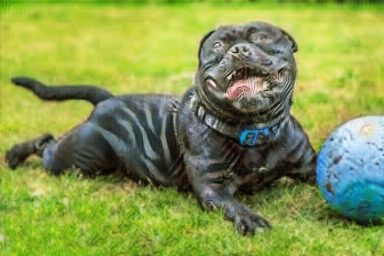

In [24]:
# Run horse2zebra on the dog image, we'll have to use the preprocess transforms for CycleGAN
preprocess = vis.transforms.Compose([
    vis.transforms.Resize(256),
    vis.transforms.ToTensor()
])

img = pil.Image.open(os.path.expanduser('~/Pictures/dog.jpg'))
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)

batch_out = netG(batch_t)
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
vis.transforms.ToPILImage()(out_t)

Search to see how many files that contain `hubconf` on GitHub.

Until now (2020-08-22), there are 932 files that includes the word `hubconf` on GitHub. 

Let's see the Google Trend on `Pytorch Hub`.

<script type="text/javascript" src="https://ssl.gstatic.com/trends_nrtr/2213_RC01/embed_loader.js"></script> <script type="text/javascript"> trends.embed.renderExploreWidget("TIMESERIES", {"comparisonItem":[{"keyword":"pytorch hub","geo":"","time":"2004-01-01 2020-08-22"}],"category":0,"property":""}, {"exploreQuery":"date=all&q=pytorch%20hub","guestPath":"https://trends.google.com:443/trends/embed/"}); </script>

<AxesSubplot:xlabel='Month'>

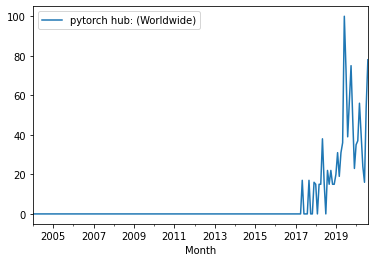

In [25]:
# Load the google trend til today 
import datetime as dt
import pandas as pd
trend = pd.read_csv('google_trend_pytorch_hub.csv', parse_dates=[0])
# Plot the trend
trend.plot(x='Month', y=1)

The drop between the end of 2019 and the first half of 2020 is when the pandemic explodes.

In [26]:
# Let's see which countries top the trend
import pandas as pd
region = pd.read_csv('google_trend_pytorch_hub_region.csv', header=0).fillna(0)
region.head(n=5)

Country  pytorch hub: (1/1/04 - 8/22/20)
0                 China                            100.0
1                 India                             16.0
2         United States                             15.0
3               Georgia                              0.0
4  Bosnia & Herzegovina                              0.0

## Chapter III: All as tensors

Tensors are the numerical abstraction about anything with arbitrary dimensions, including the inputs, the intermediate representations in the network, and the output. Tensors are multidimensional, floating-point array.

Deep learning may be viewed as numerical transformations of tensors.

> ![dl_pytorch_c3_0](/media/uploads/dl_pytorch_c3_0.png)
>
> -- From the book "Deep Learning with Pytorch"

Tensors serve as representations for data with arbitrary dimensions.

> ![dl_pytorch_c3_1](/media/uploads/dl_pytorch_c3_1.png)
>
> -- From the book "Deep Learning with Pytorch"

### Comparison between Pytorch tensors and NumPy arrays.

* Both can represent data with arbitrary dimensions.
* Both support rich manipulations on the data and share almost the same APIs.
* Pytorch supports GPU accelerated operations directly on the tensors.
* Pytorch supports backtracing of the computational graph applied on the tensors.
* NumPy has exellent companion extension libraries such as SciPy, Scikit-learn, and Pandas.
* Pytorch tensors can be easily converted back and forth with NumPy arrays.
---

### Basic operations and in-memory representation

The operations on tensors always return another tensor. And the returned sensor points to the same memory location as the orignal tensor. This avoids data copying in the memory, which hugely improves computational performance. However, users have to be careful that the operations may change the underlying values.

In [27]:
import torch
# Create 1 x 4 all-one tensor
a = torch.tensor(range(4)) + 1
print(a)
# Indexing
a[0]
# Change values via assignment, notice how the value of b has also been changed.
b = a[1]
a[1] = 0
print(a)
print(b)
# Check type of the data, indexing returns a 0-dimensional tensor a.k.a the scalar
print(type(a[1]))
# Convert the 0-dimensional tensor to a python number
print(float(a[1]))
# check the memory address

# create another tensor in 2D
c = a.reshape(2, 2)
print(c.shape)

# Truly copy the tensor
d = a.clone()
d[1] = 2
print(d)
print(a)

tensor([1, 2, 3, 4])
tensor([1, 0, 3, 4])
tensor(0)
<class 'torch.Tensor'>
0.0
torch.Size([2, 2])
tensor([1, 2, 3, 4])
tensor([1, 0, 3, 4])


Tensors and NumPy arrays are contiguous byte blocks in memory, different from python list object, in which each item is stored separately in memory.

> ![dl_pytorch_c3_2](/media/uploads/dl_pytorch_c3_2.png)
> 
> -- From the book "Deep Learning with Pytorch"

Tensors are views of the underlying `torch.Storage` instances. Therefore, two tensors may share the same `Storage` instance while indexing to it in different ways.

> ![dl_pytorch_c3_3](/media/uploads/dl_pytorch_c3_3.png)
>
> -- From the book "Deep Learning with Pytorch"

---

In [28]:
# You may access the underlying storage instance by the Storage method
# The storage is regardless of the tensor's dimensions and always stores all data as a single 1-dimensional contiguous array.
print(a.storage())
print(b.storage())
print(c.storage())
print(d.storage())
# The storage is indexable
print(a.storage()[0])
print(c.storage()[0])

 1
 0
 3
 4
[torch.LongStorage of size 4]
 1
 0
 3
 4
[torch.LongStorage of size 4]
 1
 0
 3
 4
[torch.LongStorage of size 4]
 1
 2
 3
 4
[torch.LongStorage of size 4]
1
1


Tensors use `size`, `offset`, and `stride` to define the indexing rules to the underlying storage instance.

> ![dl_pytorch_c3_4](/media/uploads/dl_pytorch_c3_4.png)
>
> -- From the book "Deep Learning with Pytorch"

> "The __size__ (or shape, in NumPy parlance) is a tuple indicating how many elements across each dimension the tensor represents. The storage
__offset__ is the index in the storage corresponding to the first element in the tensor.
The __stride__ is the number of elements in the storage that need to be skipped over to
obtain the next element along each dimension."

Most tensor shape or indexing transformations do not require memory reallocation of data, but simply math transformation on `size`, `offset`, and `stride`. 

For example, when applying transpose to a tensor, there will be no memory reallocation of data. Instead, the values in the stride tuple will be swapped.

> ![dl_pytorch_c3_5](/media/uploads/dl_pytorch_c3_5.png)
>
> -- From the book "Deep Learning with Pytorch"

---

In [29]:
# Check the different size, offset, and stride in two tensors with the same underlying storage instance
print(a.shape, a.storage_offset(), a.stride())
print(c.shape, c.storage_offset(), c.stride())

torch.Size([4]) 0 (1,)
torch.Size([2, 2]) 0 (2, 1)


### Name the tensor dimensions and dimension matching

This is a handy way for humans to keep track the tensors as we go through a lot of transformations.

In [30]:
# A typical single RGB image tensor, 3 channels x 100 x 100
img_t = torch.randn(3, 5, 5)
weights = torch.tensor([0.2126, 0.7152, 0.0722], names=['channels']) # These value will be applied to each channel
print(weights)
# A typical batch of RGB images tensor, 12 batches x 3 channels x 100 x 100
batch_t = torch.randn(2, 3, 5, 5)
# The index of the channel dimension is different in img_t and batch_t
# We better add consistent names to img_t and batch_t
img_t = img_t.refine_names('channels', 'width', 'height')
print(img_t.names)
batch_t = batch_t.refine_names(None, 'channels', 'width', 'height')
print(batch_t.names)
# Convert the RGB image to grayscale
# First make sure the weights tensor has the same dimension as img_t
weights_aligned = weights.align_as(img_t)
print(weights_aligned.shape, weights_aligned.names)
# Apply transformation
grayscale_t = (img_t * weights_aligned).sum('channels')
print(grayscale_t.shape, grayscale_t.names)
# Convert the grayscale to have the channel dimension
grayscale_t = grayscale_t.align_as(img_t)
print(grayscale_t.shape, grayscale_t.names)

# Note that not all operations support named tensors, so you have to know how to convert it back to unnamed tensors
grayscale_t = grayscale_t.rename(None)
print(grayscale_t.shape, grayscale_t.names)

tensor([0.2126, 0.7152, 0.0722], names=('channels',))
('channels', 'width', 'height')
(None, 'channels', 'width', 'height')
torch.Size([3, 1, 1]) ('channels', 'width', 'height')
torch.Size([5, 5]) ('width', 'height')
torch.Size([1, 5, 5]) ('channels', 'width', 'height')
torch.Size([1, 5, 5]) (None, None, None)


<ipython-input-30-3d58973ed29e>:3: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:840.)
  weights = torch.tensor([0.2126, 0.7152, 0.0722], names=['channels']) # These value will be applied to each channel


### Tensor data types and impact on model performance

Why pytorch needs dedicated data types?

* Numbers in Python are object, occupying more memory than floating numbers.
* Lists in Python are collections of objects, not just numbers.
* Python is an interpreter and runs slow on math operations.

Pytorch supports floating and integer data types as NumPy supported. While most modern CPU uses at least 32-bit floating point numbers, modern GPUs can support 16-bit floating point numbers. Integer tensors will always be created with `int64` type, this can support large scale indexing for tensors with millions of elements.

The performance impacted by data types.

* 64-bit floating point numbers do not really improve the performance over 32-bit floating point numbers.
* 16-bit floating point numbers can cut model size into half with slight sacrifice in the performance.

### Contiguous tensors

This is something that I'm now getting it. Here's some explanation from the PyTorch forum.

> Contiguous is the term used to indicate that the memory layout of a tensor does not align with its advertised meta-data or shape information.
> 
> -- https://discuss.pytorch.org/t/contigious-vs-non-contigious-tensor/30107/7

---

This basically means the order of each data in the memory matches the order of the meta-data of the tensor (size, offset, stride). So a contiguous tensor typically is the tensor when being first created and has not been applied any transformations that change the values of stride, size or offset.

In [31]:
### Check contiguous status
print(a.is_contiguous())
print(b.is_contiguous())
print(c.is_contiguous())
print(d.is_contiguous())
# transpose 
e = c.transpose(0, 1)
print(c.stride())
print(e.stride())
print(e.is_contiguous())

True
True
True
True
(2, 1)
(1, 2)
False


### Interoperability on GPU, with NumPy

With GPU, all operations will be on GPU, but accessing and printing will wake up CPU. All APIs are available for gpu-enabled tensors. And the storage instance of the cpu tensors will be copied to the RAM of the GPU.

With NumPy, the storage instance will be the same for NumPy array and the tensor. Note that the floating point number in NumPy array is 64-bit, so after converting back from NumPy, **make sure we cast the tensor to `torch.float32` to save computational power**.

In [32]:
# To GPU, no GPU available so error raised
test = torch.rand(3)
try:    
    test.to(device='cuda:0')
except AssertionError as e:
    print(e)

# To NumPy
test_np = test.numpy()
print(test_np.dtype)

# From NumPy
import numpy as np
test_np = np.random.rand(3)
print(test_np.dtype)
test = torch.from_numpy(test_np)
print(test.dtype)
test = test.to(dtype=torch.float32)
print(test.dtype)

Torch not compiled with CUDA enabled
float32
float64
torch.float64
torch.float32


PyTorch uses dispatching mechanism to make the operations are interoperational over data stored on different backends.

> ![dl_pytorch_c3_6](/media/uploads/dl_pytorch_c3_6.png)
>
> -- From the book "Deep Learning with Pytorch"

### Conditional indexing on tensors

We may use bool tensor as indices to index the tensors.

In [33]:
# Create a tensor 
a = torch.tensor([[1, 2, 3], [4, 5, 6]]).float()
print(a.shape, a.dtype)
# Indexing the the first row using bool array
mask = torch.tensor([1, 0]).bool()
print(mask.shape, mask.dtype)
first_row = a[mask, :]
print(first_row)

# Create bool array using comparison operators
mask2 = a < 3
a_lt_2 = a[mask2]
print(a_lt_2)

torch.Size([2, 3]) torch.float32
torch.Size([2]) torch.bool
tensor([[1., 2., 3.]])
tensor([1., 2.])


### Serializing tensors

Serializing could be to pickle files, to hdf5 format, or to csv readable format.

> HDF5 is a portable, widely supported
format for representing serialized multidimensional arrays, organized in a nested keyvalue
dictionary.

In [34]:
# Save as pickle
torch.save(a, 'a.t')
# Load pickle
a = torch.load('a.t')
print(a)

tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [35]:
# Save as hdf5
import h5py
with h5py.File('a.hdf5', 'w') as f:
    dset = f.create_dataset('test', data=a.numpy())

# Load hdf5
with h5py.File('a.hdf5', 'r') as f:  
    test_h5 = f['test']
    print(torch.from_numpy(test_h5[:]))

tensor([[1., 2., 3.],
        [4., 5., 6.]])


### Excercise

In [36]:
# cos needs float pointing number
a_32 = a.to(torch.float32)
print(a_32.cos())
print(a_32.sqrt())
print(a_32.storage())
# inplace
torch.cos(a_32, out=a_32)
print(a_32.storage())
# or
a_32.cos_()
print(a_32.storage())

tensor([[ 0.5403, -0.4161, -0.9900],
        [-0.6536,  0.2837,  0.9602]])
tensor([[1.0000, 1.4142, 1.7321],
        [2.0000, 2.2361, 2.4495]])
 1.0
 2.0
 3.0
 4.0
 5.0
 6.0
[torch.FloatStorage of size 6]
 0.5403023362159729
 -0.416146844625473
 -0.9899924993515015
 -0.6536436080932617
 0.28366219997406006
 0.9601702690124512
[torch.FloatStorage of size 6]
 0.8575531840324402
 0.9146533012390137
 0.5486961603164673
 0.7938734292984009
 0.9600369334220886
 0.5733804702758789
[torch.FloatStorage of size 6]


## Chapter IV: Turn real-world data into tensors

### Dealing with images

Convert RGB images as tensors. Note how the dimensions in pytorch are formed as `channels x height x width`. But in tensorflow, the dimensions are by default formed as `height x width x channels`.

In [37]:
# Read in an image
import imageio
import torch
img = imageio.imread(os.path.expanduser('~/Pictures/dog.jpg'))
# shape is in height x width x channels
print(img.shape)
# pytorch tensors should have the dimensions formed as channels x height x width, so we need to rearrange the dimensions
img_t = torch.from_numpy(img)
print(img_t.shape)
# rearrange
img_t = img_t.permute(2, 0, 1)
print(img_t.shape)
# Put the image in a batch by adding a new dimension at dimension 0, for pytorch it becomes batch x channels x height x width
batch_t = img_t.unsqueeze(0)
batch_t = batch_t.expand(5, -1, -1, -1)
print(batch_t.shape)
# Or create a batch_t at first and then copy the image to the batch
batch_t = torch.zeros(5, 3, 183, 275)
batch_t[0] = img_t
print(batch_t.shape)
# Images by default are stored as unsigned 8-bit integers. 
print(batch_t[0, 0, 0, 0].dtype)
# We need to convert them into floating point numbers.
batch_t = batch_t.float()
print(batch_t[0, 0, 0, 0].dtype)
# And better normalize them to [0, 1] or [-1, 1] which is required for efficient optimization when training the neural network
# Normalize them to [0, 1]
batch_t = batch_t / 255.0
# Standardize them to have zero mean and unit standard variation
# The mean is computed for each channel across the batch
mean_c_t = batch_t.mean([0, 2, 3]).unsqueeze(1).unsqueeze(1)
std_c_t = batch_t.std([0, 2, 3]).unsqueeze(1).unsqueeze(1)
print(mean_c_t.shape)
print(std_c_t.shape)
# Using broadcasting semantics, the trailing singleton dimensions (height, width) will be expanded automatically to do pointwise operations 
n_batch_t = (batch_t - mean_c_t) / std_c_t
print(n_batch_t.mean([0, 2, 3])) # Close to 0, because this is numerical
print(n_batch_t.std([0, 2, 3]))

(183, 275, 3)
torch.Size([183, 275, 3])
torch.Size([3, 183, 275])
torch.Size([5, 3, 183, 275])
torch.Size([5, 3, 183, 275])
torch.float32
torch.float32
torch.Size([3, 1, 1])
torch.Size([3, 1, 1])
tensor([-4.7537e-06,  5.6847e-06, -5.5248e-06])
tensor([1., 1., 1.])


### Dealing with 3D images or videos

In addition to channels, 3D images and videos will have one more dimension for depth, and for time. Therefore, the shape of a batch of 3D images would be: `batch x channel x depth x height x width`; while the shape of a batch of videos would be: `batch x channel x time x height x width`. 

Example of 3D CT images

> ![dl_pytorch_c4_1](/media/uploads/dl_pytorch_c4_1.png)
>
> -- From the book "Deep Learning with Pytorch"

Related APIs and resources to load and transform videos in PyTorch.

1. [torchvision.io.video](https://pytorch.org/docs/1.3.0/torchvision/io.html#video)
2. [pytorch-VideoDataset](https://github.com/YuxinZhaozyx/pytorch-VideoDataset)
3. [torch_videovision](https://github.com/hassony2/torch_videovision)

### Dealing with tabular data

Pytorch tensors are homogeneous, but tabular data may include categorical, atomic data, which need to be converted to numerical data, usually with One-hot encoding.

By convention, the dimension of tabular data in PyTorch may be represented as `batch x channel`.

1. Continuous values: as real numbers, strictly ordered, strict meaning in the difference between values. Support mathematical operations on the values.
    1. Ratio scale: the difference between values can be computed as the ratio of the values.
    2. Interval scale: the difference between values can only be computed as interval between values.
2. Ordinal values: as real integers, strictly ordered, but no fixed meaning in the difference between values. Do not support mathematical operations on the values but just ordering operations.
3. Categorical values: as real integers, no order, no fixed meaning in the difference between values. Do not support mathematical and ordering operations on the values. They are on nominal scale.

In [38]:
# Load the wine quality tabular dataset
!wget http://mng.bz/90Ol --no-check-certificate -O wine.csv
    
import csv
import numpy as np
wineq_numpy = np.loadtxt('wine.csv', dtype=np.float32, delimiter=";",
skiprows=1)
wineq = torch.from_numpy(wineq_numpy)
wineq.size()

--2020-09-17 15:28:55--  http://mng.bz/90Ol
Resolving mng.bz (mng.bz)... 35.166.24.88
Connecting to mng.bz (mng.bz)|35.166.24.88|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://mng.bz/90Ol [following]
--2020-09-17 15:28:58--  https://mng.bz/90Ol
Connecting to mng.bz (mng.bz)|35.166.24.88|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 301 
Location: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv [following]
--2020-09-17 15:29:01--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [application/x-httpd-php]
Saving to: 'wine.csv'

     0K .......... .......... .....

torch.Size([4898, 12])

In [39]:
X = wineq[:, :-1]
y = wineq[:, -1].long()
X.shape, y.shape, X.dtype, y.dtype

(torch.Size([4898, 11]), torch.Size([4898]), torch.float32, torch.int64)

One hot encoding on `y` if we want to use it as model input, otherwise we may use it directly as the target of the model.

Note the size of the onehot encoded array should be long enough to include the max of `y` (sometimes `y` does not start from 0).

In [40]:
encoded_y = torch.zeros(y.shape[0], y.max() + 1)
print(y.unique())
encoded_y.scatter_(1, y.unsqueeze(1), 1.0)
encoded_y.shape, encoded_y.dtype

tensor([3, 4, 5, 6, 7, 8, 9])


(torch.Size([4898, 10]), torch.float32)

### Dealing with time series data

1. Time series tabular data

By convention, the dimensions of time series tabular data would typically be `batch x channel x time`, where each channel represents one feature.

2. Audio or sensor data

By convention, the dimensions of audio or sensor data (represented in spectrogram) would typically be `batch x channel x freq x time`, where channel is the "audio channel (e.g., left and right) or "axial channel" (e.g., x, y, and z for multiaxial sensors) and `freq x time` look like an image. Therefore, networks used for images may be used for audio tensors as well.

Some good tools and resources to deal with time series data in PyTorch.

1. [torchaudio](https://pytorch.org/audio/)
2. [pytorch-ts](https://github.com/zalandoresearch/pytorch-ts)

### Dealing with text

Text needs to be converted to numbers, using embedding.

In [44]:
!wget https://www.gutenberg.org/files/1342/1342-0.txt

--2020-09-17 16:45:01--  https://www.gutenberg.org/files/1342/1342-0.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 799738 (781K) [text/plain]
Saving to: '1342-0.txt'

     0K .......... .......... .......... .......... ..........  6%  277K 3s
    50K .......... .......... .......... .......... .......... 12%  284K 2s
   100K .......... .......... .......... .......... .......... 19%  888K 2s
   150K .......... .......... .......... .......... .......... 25%  383K 2s
   200K .......... .......... .......... .......... .......... 32%  781K 1s
   250K .......... .......... .......... .......... .......... 38%  840K 1s
   300K .......... .......... .......... .......... .......... 44%  780K 1s
   350K .......... .......... .......... .......... .......... 51%  765K 1s
   400K .......... .......... .......... .......... ..........

In [91]:
import re
with open('1342-0.txt', encoding='utf8') as f:
    text = f.read()
    text = text.lower().strip()
tokens = re.split('\n+', text)
print(len(tokens), len(np.unique(tokens)))

12154 12119


In [97]:
# Apply onehot encoding to each character for each line with ASCII encoding

# 128 ASCII characters
onehot_tokens = []
for token in tokens:
    token = token.lower().strip()
    onehot_token = torch.zeros(len(token), 128)
    # Use ord to get ASCII code for the character
    for i, c in enumerate(token):
        if ord(c) < 128:
            onehot_token[i][ord(c)] = 1
    onehot_tokens.append(onehot_token)

In [93]:
# Apply onehot encoding to each word

### Encoding schemes

Encoding is needed for categorical data. Depending on whether ordering matters or not, the categorical data may be encoded as continuous values or onehot coded integers. More than that, variables may be encoded via **embedding** that converts categorical relational data (such as words) into numerical vectors, and use the distances between the encoded vectors to measure the similarity between the categorical data.

Here's the workflow for encoding different types of data as tensors for pytorch models, embedding is not included.

> ![dl_pytorch_c4_2](/media/uploads/dl_pytorch_c4_2.png)
>
> -- From the book "Deep Learning with Pytorch"
---

**The curated list related to PyTorch.** https://www.ritchieng.com/the-incredible-pytorch/